# Exploratory Data Analysis (EDA) and Data Pre-Processing
## DSBA 6165 Group Project
## Divam Arora, Connor Moore, Hemanth Velan

### Sources:
- https://huggingface.co/datasets/gigaword
- https://www.statology.org/seaborn-log-scale/
- https://huggingface.co/docs/datasets/process#export
- https://huggingface.co/docs/datasets/v1.11.0/splits.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://www.geeksforgeeks.org/string-punctuation-in-python/
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- https://www.analyticsvidhya.com/blog/2021/06/pre-processing-of-text-data-in-nlp/
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
- https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
- https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
- https://stackoverflow.com/questions/41425945/python-pandas-error-missing-unterminated-subpattern-at-position-2
- https://aparnamishra144.medium.com/how-to-change-string-data-or-text-data-of-a-column-to-lowercase-in-pandas-248a8ce4ae01
- https://colab.research.google.com/github/glopasso/capstone/blob/master/extractive/notebooks/02-exploratory-data-analysis.ipynb#scrollTo=aulxLyyFFkei




In [1]:
# import needed packages
import datasets as ds
import pandas as pd
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# download stop word package from nltk library
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...


True

## Load dataset
For our project, we will be utilizing the Gigaword dataset from Hugging Face's dataset library, sourced here - https://huggingface.co/datasets/gigaword

This dataset is a series of document-summary pairs, all in string format. The dataset is pre-split into train, validation, and test sets. The train set has 3,803,957 rows, the validation set has 189,651 rows, and the test set has 1,951 rows.

In [2]:
# https://huggingface.co/datasets/gigaword
# https://huggingface.co/docs/datasets/v1.11.0/splits.html

# download gigaword dataset from Hugging Face dataset library
train, test, validation = ds.load_dataset("gigaword", split=["train", "test", "validation"])

Generating train split:   0%|          | 0/3803957 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/189651 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1951 [00:00<?, ? examples/s]

Dataset gigaword downloaded and prepared to C:/Users/heman/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# display the dataset splits
print(train)
print(test)
print(validation)

Dataset({
    features: ['document', 'summary'],
    num_rows: 3803957
})
Dataset({
    features: ['document', 'summary'],
    num_rows: 1951
})
Dataset({
    features: ['document', 'summary'],
    num_rows: 189651
})


Looking at the output above, we can confirm that the dataset downloaded successfully, and double check the number of rows for each split. Each data subset consists of the same two features - 
- "document" - a news article headline combined with its first sentence to serve as input
- "summary" - a summary statement based on the content of the document input

Next we will export the splits to pandas dataframes to conduct our exploratory data analysis and data pre-processing.

In [4]:
# https://huggingface.co/docs/datasets/process#export

# export the training dataset to a pandas dataframe and display
df_train = train.to_pandas()
print("Train df exported.")

# export the test dataset to a pandas dataframe
df_test = test.to_pandas()
print("Test df exported.")

# export the validation dataset to a pandas dataframe
df_val = validation.to_pandas()
print("Validation df exported.")

Train df exported.
Test df exported.
Validation df exported.


In [5]:
# display the new training dataframe
df_train

,document,summary
0,australia 's current account deficit shrunk by...,australian current account deficit narrows sha...
1,at least two people were killed in a suspected...,at least two dead in southern philippines blast
2,australian shares closed down #.# percent mond...,australian stocks close down #.# percent
3,south korea 's nuclear envoy kim sook urged no...,envoy urges north korea to restart nuclear dis...
4,south korea on monday announced sweeping tax r...,skorea announces tax cuts to stimulate economy
...,...,...
3803952,"the state duma , the lower house of the russia...",duma urges yeltsin to reconsider troop pullout...
3803953,the u.s. justice department today rejected a t...,us justice department rejects special probe of
3803954,the united nations is calling for ### million ...,un seeks fund for programs in former yugoslavia
3803955,president jacques chirac today won a present o...,chirac gets birthday gift of ##th century african


Like the Hugging Face dataset, the dataframe contains two columns - one for input document, and one for the resulting summary.

In [6]:
# concatenate three splits into a single dataframe for EDA and pre-processing
frames = [df_train, df_test, df_val]
corpus = pd.concat(frames, ignore_index=True)

# display new concatenated dataframe
print(corpus)

                                                  document  \
0        australia 's current account deficit shrunk by...   
1        at least two people were killed in a suspected...   
2        australian shares closed down #.# percent mond...   
3        south korea 's nuclear envoy kim sook urged no...   
4        south korea on monday announced sweeping tax r...   
...                                                    ...   
3995554  thailand 's traffic death toll soared to ### o...   
3995555  at least seven people were killed on the new y...   
3995556  survey showed thailand 's suicide rate decline...   
3995557  the nepali government has announced the year #...   
3995558  thai national center for genetic engineering a...   

                                                   summary  
0        australian current account deficit narrows sha...  
1          at least two dead in southern philippines blast  
2                 australian stocks close down #.# percent  
3        en

Observing the new combined output, the comprehensive dataset has a total of 3,995,559 rows. We can now conduct our EDA then perform data pre-processing.

## Exploratory Data Analysis

In [7]:
# first, check for null values

print(corpus.isnull().sum())

document    0
summary     0
dtype: int64


We confirmed there are no null values in either column, which is a good starting point.

In [8]:
# inspiration for generating numeric columns for descriptive statistics and analysis from the following notebook -
# https://colab.research.google.com/github/glopasso/capstone/blob/master/extractive/notebooks/02-exploratory-data-analysis.ipynb#scrollTo=aulxLyyFFkei,
# comments were added to source code for clarity and function calls were modified to fit our workspace

# define functions used to create numeric columns for analysis

# remove punctuation from entries
def tokens_without_punctuation(text):
    tokens = word_tokenize(text)
    no_punctuation = [x for x in tokens if not re.fullmatch('[' + string.punctuation + ']+', x)]
    return no_punctuation

# count words per entry
def len_tokens_without_punctuation(text):
    return(len(tokens_without_punctuation(text)))

# separates sentences that are ended with "\n" rather than punctuation
def sentence_tokenize(text):
    sentence_tokenized = list()
    for txt in text.split('\n'):
        sentence_tokenized += nltk.sent_tokenize(txt)
    return sentence_tokenized

# count sentences per entry
def len_sentence_tokenize(text):
    return len(sentence_tokenize(text))

In [9]:
# idea for creating numeric columns for EDA from - 
# https://colab.research.google.com/github/glopasso/capstone/blob/master/extractive/notebooks/02-exploratory-data-analysis.ipynb#scrollTo=aulxLyyFFkei,
# comments and progress outputs added to source code, function inputs and variables were updated to match our dataset

# generate numeric columns in corpus dataframe for sentence, word, and character counts using previously defined tokenization and length functions

# create character count columns for summary and document entries
corpus['document_char_count'] = corpus['document'].apply(len)
corpus['summary_char_count'] = corpus['summary'].apply(len)
print("character counts completed.")

# create word count columns for summary and document entries
corpus['document_word_count'] = corpus['document'].apply(len_tokens_without_punctuation)
corpus['summary_word_count'] = corpus['summary'].apply(len_tokens_without_punctuation)
print("word counts completed.")

# create sentence count columns for summary and document entries
corpus['document_sentence_count'] = corpus['document'].apply(len_sentence_tokenize)
corpus['summary_sentence_count'] = corpus['summary'].apply(len_sentence_tokenize)
print("sentence counts completed.")

character counts completed.
word counts completed.
sentence counts completed.


In [10]:
# display new version of corpus dataframe with numeric count columns
corpus.head()

,document,summary,document_char_count,summary_char_count,document_word_count,summary_word_count,document_sentence_count,summary_sentence_count
0,australia 's current account deficit shrunk by...,australian current account deficit narrows sha...,191,50,28,6,1,1
1,at least two people were killed in a suspected...,at least two dead in southern philippines blast,149,47,25,8,1,1
2,australian shares closed down #.# percent mond...,australian stocks close down #.# percent,137,40,20,5,1,1
3,south korea 's nuclear envoy kim sook urged no...,envoy urges north korea to restart nuclear dis...,166,54,26,8,1,1
4,south korea on monday announced sweeping tax r...,skorea announces tax cuts to stimulate economy,180,46,25,7,1,1


The comprehensive corpus dataframe now includes numeric columns for character, word, and sentence counts for document and summary inputs. These columns can be used to generate descriptive statistics.

In [11]:
# this line of code was common sense, but for citation's sake, it was also used in -
# https://colab.research.google.com/github/glopasso/capstone/blob/master/extractive/notebooks/02-exploratory-data-analysis.ipynb#scrollTo=aulxLyyFFkei

# produce descriptive statistics for numeric columns
corpus.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
document_char_count,3995559.0,181.53,47.37,3.0,151.0,182.0,209.0,636.0
summary_char_count,3995559.0,51.10,14.71,6.0,41.0,50.0,60.0,265.0
document_word_count,3995559.0,28.62,7.58,0.0,24.0,28.0,33.0,92.0
summary_word_count,3995559.0,8.05,2.37,1.0,6.0,8.0,9.0,43.0
document_sentence_count,3995559.0,1.01,0.13,1.0,1.0,1.0,1.0,40.0
summary_sentence_count,3995559.0,1.00,0.05,1.0,1.0,1.0,1.0,4.0


Utilizing the new numeric columns, we are able to generate descriptive statistics for character, word, and sentence count values for the document inputs and summaries. Mean values are all higher for the document inputs than the summaries, which is to be expected as a summary is supposed to be a shortened version of the input. Average character count is almost four times higher (181 vs 51) and average word count is roughly 3.5 times higher (28 vs 8). Mean sentence count is much closer together (1.01 vs. 1.00), but this may be because headlines are often only one sentence long anyway, or because the style of tokenization used to create these values removed most punctuation. Minimum values for all counts were similar for document entries and summaries, but maximum values varied greatly. The document entry with the most characters had over 630, and the highest summary character count was only 265. The maximum document entry word count was over twice the maximum summary word count (92 vs. 43), and the document entry with the most sentences was ten times longer than the summary with the most sentences (40 vs. 4). We were inclined to believe the 40 sentence count for document entry may be in error (or at least an extreme outlier), as a headline with that many sentences is nearly unheard of.

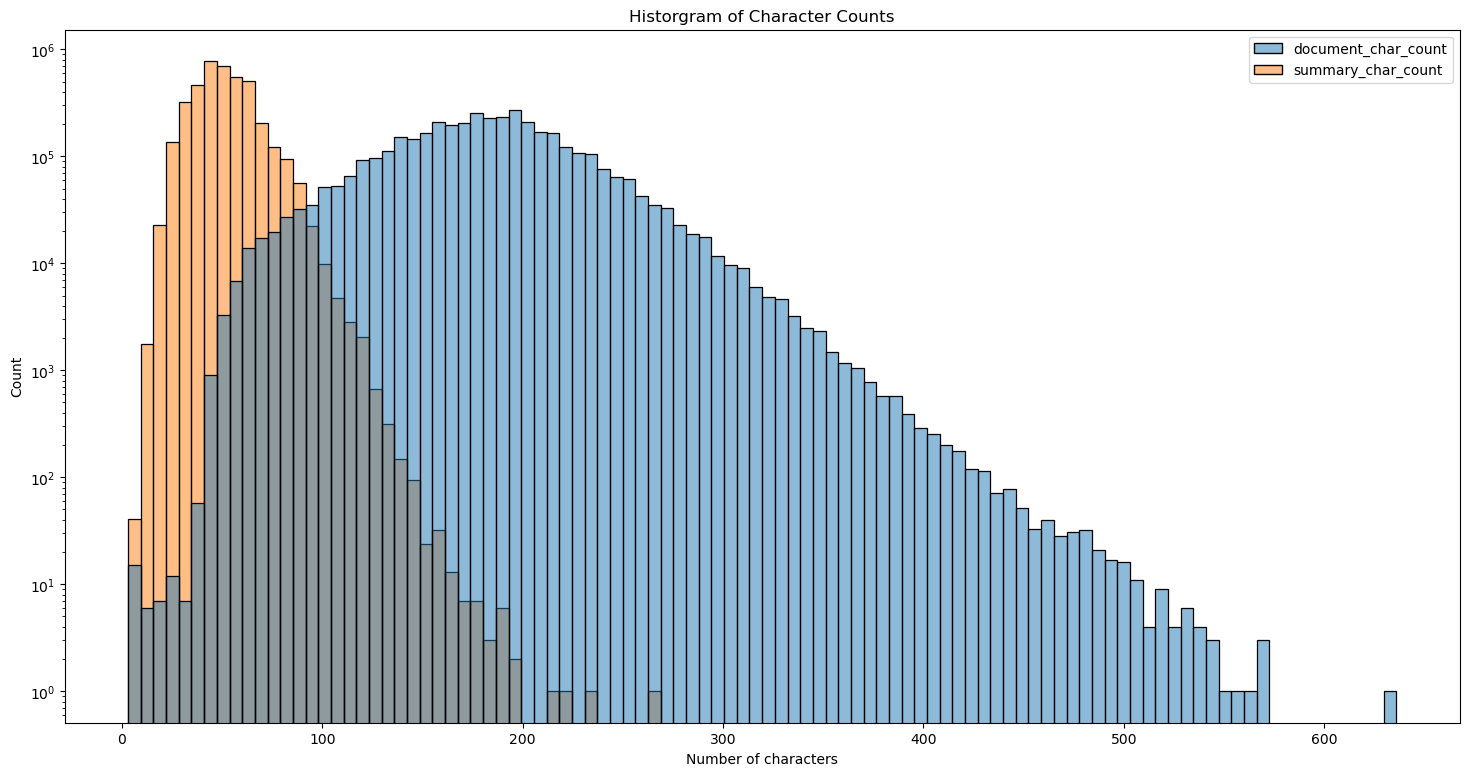

In [12]:
# these documentation pages were used in combination with a source code collab notebook to create the following three histograms using the numeric columns
# the idea to use the numeric columns for comparative histograms was from the source code collab notebook,
# but we generated the histograms themselves in a different way using seaborn
# https://seaborn.pydata.org/generated/seaborn.histplot.html
# https://www.statology.org/seaborn-log-scale/
# https://colab.research.google.com/github/glopasso/capstone/blob/master/extractive/notebooks/02-exploratory-data-analysis.ipynb#scrollTo=aulxLyyFFkei
# https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/

# character count histogram

# isolate the character count columns of the corpus df
corpus_char_count = corpus[["document_char_count", "summary_char_count"]]

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Number of characters")
ax.set_title("Historgram of Character Counts")

# generate the histogram using seaborn
# we chose to use 100 bins for the histogram after some trial and error due to the size of the dataset (almost 4 million) and the wide range of values (roughly 650)
sns.histplot(data=corpus_char_count, bins=100, ax=ax)
# use a log scale for the y axis count values due to their massive size
# we found this produced a more meaningful graph
plt.yscale('log')

Looking at the histogram above, it is immediately apparent that the document entries have a far wider range than the summaries, as well as a very slightly more balanced distribution. However, both values are still heavily right skewed, with document entries peaking around 200 characters and summaries peaking around 50. Summaries have much higher counts for character counts between 0 and 100, quickly falling in frequency as character count values increase beyond that, with only a few outlier instances having character counts higher than 200. The majority of document entries seem to fall between 100 and 300 characters, with only a few examples having less than 50 characters or more than 500.

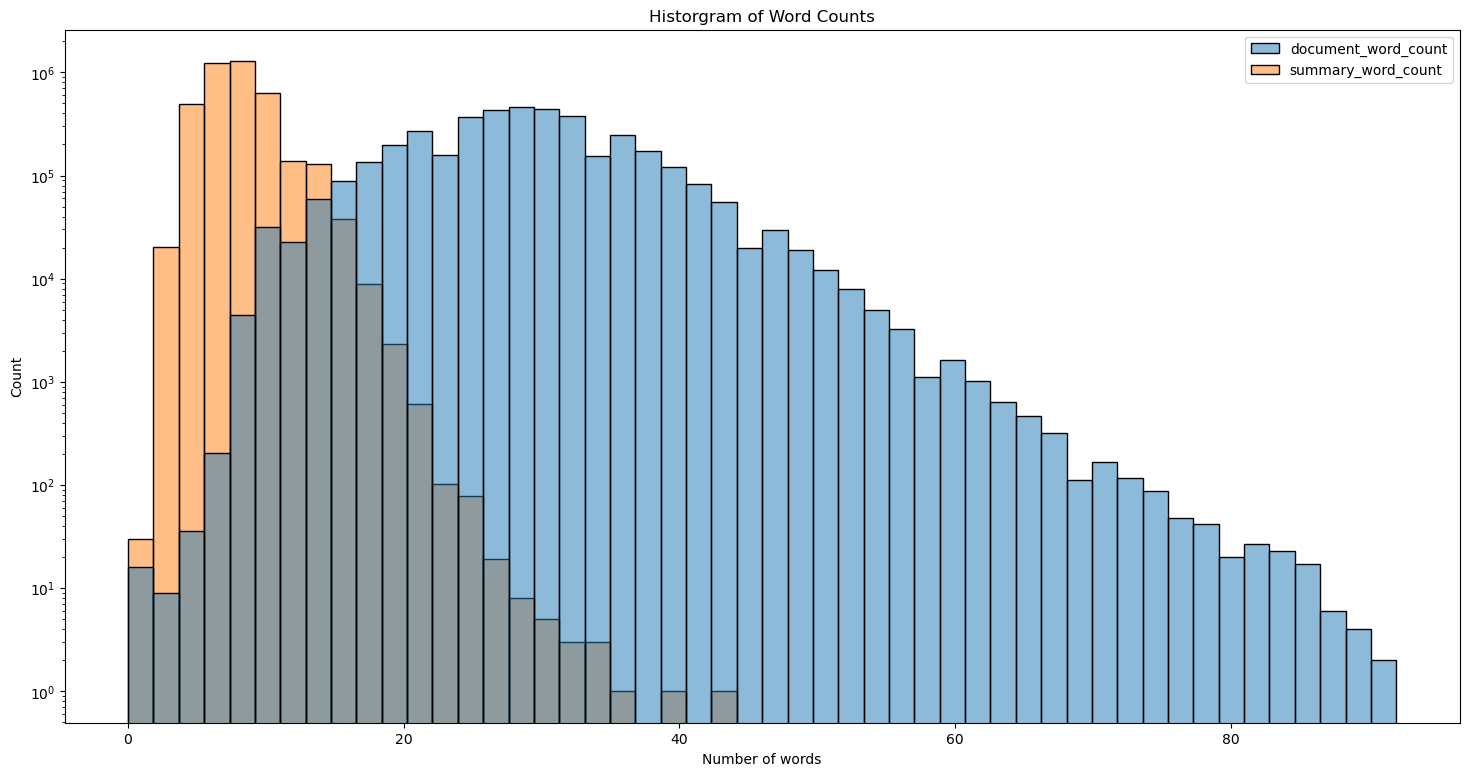

In [13]:
# word count histogram

# isolate the word count columns of the corpus df
corpus_word_count = corpus[["document_word_count", "summary_word_count"]]

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Number of words")
ax.set_title("Historgram of Word Counts")

# generate the histogram using seaborn
# we chose to use 50 bins for the histogram after some trial and error due to the smaller range of values relative to the previous data subset
sns.histplot(data=corpus_word_count, bins=50, ax=ax)
# we also used a log scale for the y axis count values in this histogram
# we found this also produced a more meaningful graph here
plt.yscale('log')

The distribution of values for word count for document entries and summaries is similar to the previous character count, but this makes logical sense as an entry having more or less characters is likely to have more or less words. As a result, it would be expected that the number of characters would at least loosely follow the distribution of character counts. The values here are of course much lower, with document entries peaking at around 30 words, and summaries peaking between 7 and 10 words. Both value sets are still right skewed, though possibly slightly less right skewed than the character count values were. The distinction between how right skewed the summary set is vs. the document set is more pronounced here. The majority of summary instances fall betweeen 5 and 20 words, while the document instances have relatively high counts anywhere from 10 to almost 50 words.

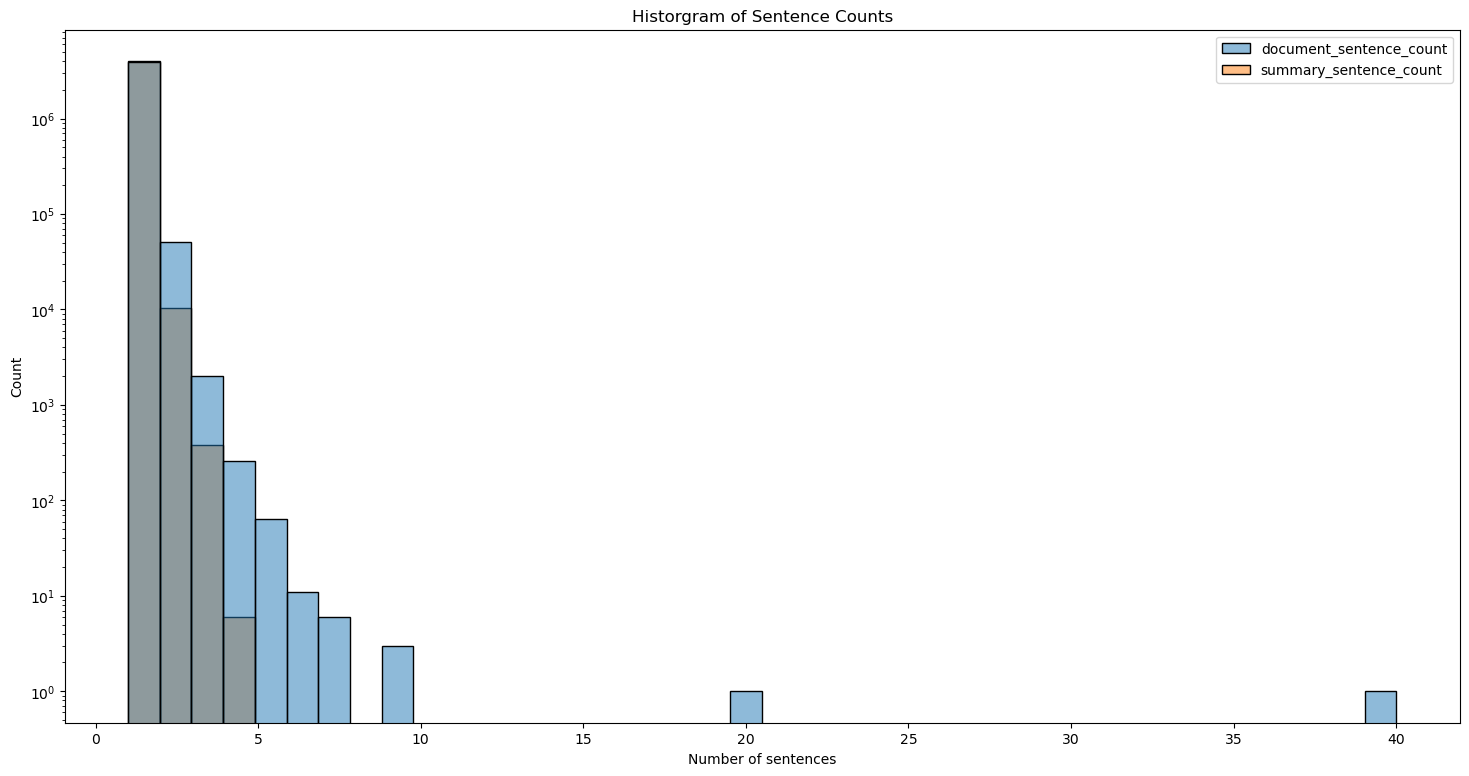

In [14]:
# sentence count histogram

# isolate the sentence count columns of the corpus df
corpus_sent_count = corpus[["document_sentence_count", "summary_sentence_count"]]

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Number of sentences")
ax.set_title("Historgram of Sentence Counts")

# generate the histogram using seaborn
# we chose to use 40 bins for the histogram after some trial and error due to the extremely tight distribution of values
# we found that this most comprehensively portrayed the data
sns.histplot(data=corpus_sent_count, bins=40, ax=ax)
# we also used a log scale for the y axis count values in this histogram
# we found this also produced a more meaningful graph here
plt.yscale('log')

While not necessarily surprising, this graph does still provide some interesting information about the dataset. It seems likely that the two document entries with 40 and 20 sentences are likely due to some kind of error, and if not they are extreme outliers. Other than these two, every other instance, document or summary, had less than ten sentences, with summaries all having less than five. These distributions are both, of course, very right skewed.

<Axes: title={'center': 'Bar Chart of Most Common Words in Document Entries'}, xlabel='Count', ylabel='Most common words'>

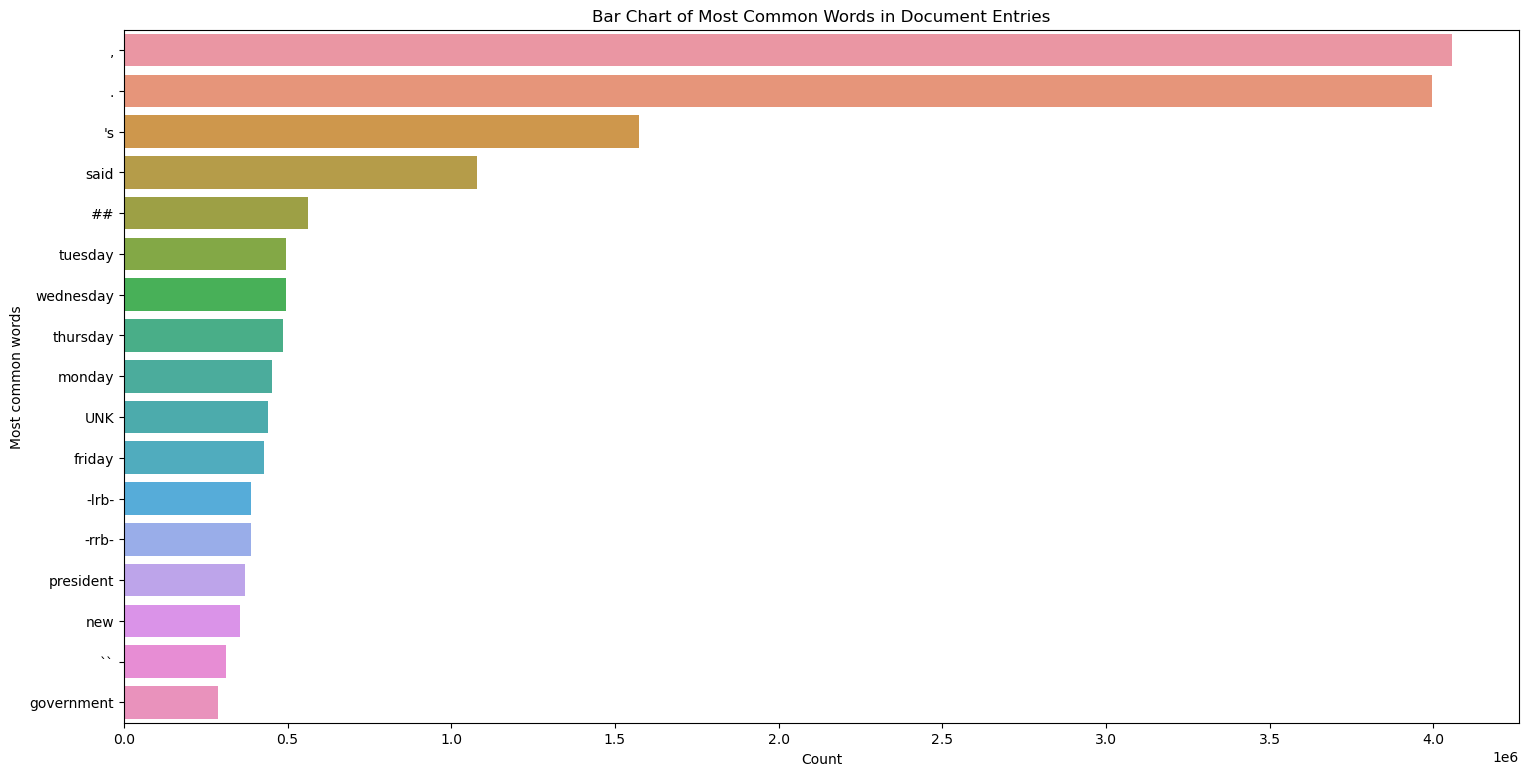

In [15]:
# inspiration for the remaining EDA methods came from the following article -
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# the follow example code was used to construct the following two bar charts -
# https://app.neptune.ai/o/neptune-ai/org/eda-nlp-tools/n/1-4-top-non-stopwords-barchart-36267acc-a418-4a5f-a3ba-67a3b51dde12/b57bc536-8cec-46a7-918c-60fba6f2c83d
# comments were added, variables and inputs were modified in the source code to fit our workspace, and different parameters were used to create the graphs

# bar chart of most common non-stopwords in document entries

# create variable for list of stopwords
stop = set(stopwords.words("english"))

# isolate document column of corpus df
corpus_doc = corpus["document"]

# separate individual words in all document entries into lists
# compile all words from all entries into one list
corpus_splt = corpus_doc.str.split()
corpus_list = corpus_splt.values.tolist()
words = [word for i in corpus_list for word in i]

# create a word counter that identifies the most common words in our list
counter = Counter(words)
most = counter.most_common()

# set x and y variables as lists
x, y= [], []

# for words and their word counts in the list of 40 most common words
for word,count in most[:40]:
    # if the word is not a stop word
    if (word not in stop):
        # append the word and its count to the x and y lists
        x.append(word)
        y.append(count)

# specify the parameters for the graph and generate
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common words")
ax.set_title("Bar Chart of Most Common Words in Document Entries")
sns.barplot(x=y,y=x)

Prior to tokenization, it makes sense that some of the most common "words" isolated by the simple split() command would be punctuation or an apostrophe "S". "Said" being high also seems to make sense for headlines and news articles, as statements and quotes are often used as a way of grabbing attention or summarizing a situation. We found the relative order of the days of the week interesting - Tuesday seems to be the heaviest day for newsworthy events in our sample. We were unsure what "UNK" is (if not an abbreviation for "The University of Nebraska Kearney," which seems unlikely). "President" and "government" are to be expected.

<Axes: title={'center': 'Bar Chart of Most Common Words in Summaries'}, xlabel='Count', ylabel='Most common words'>

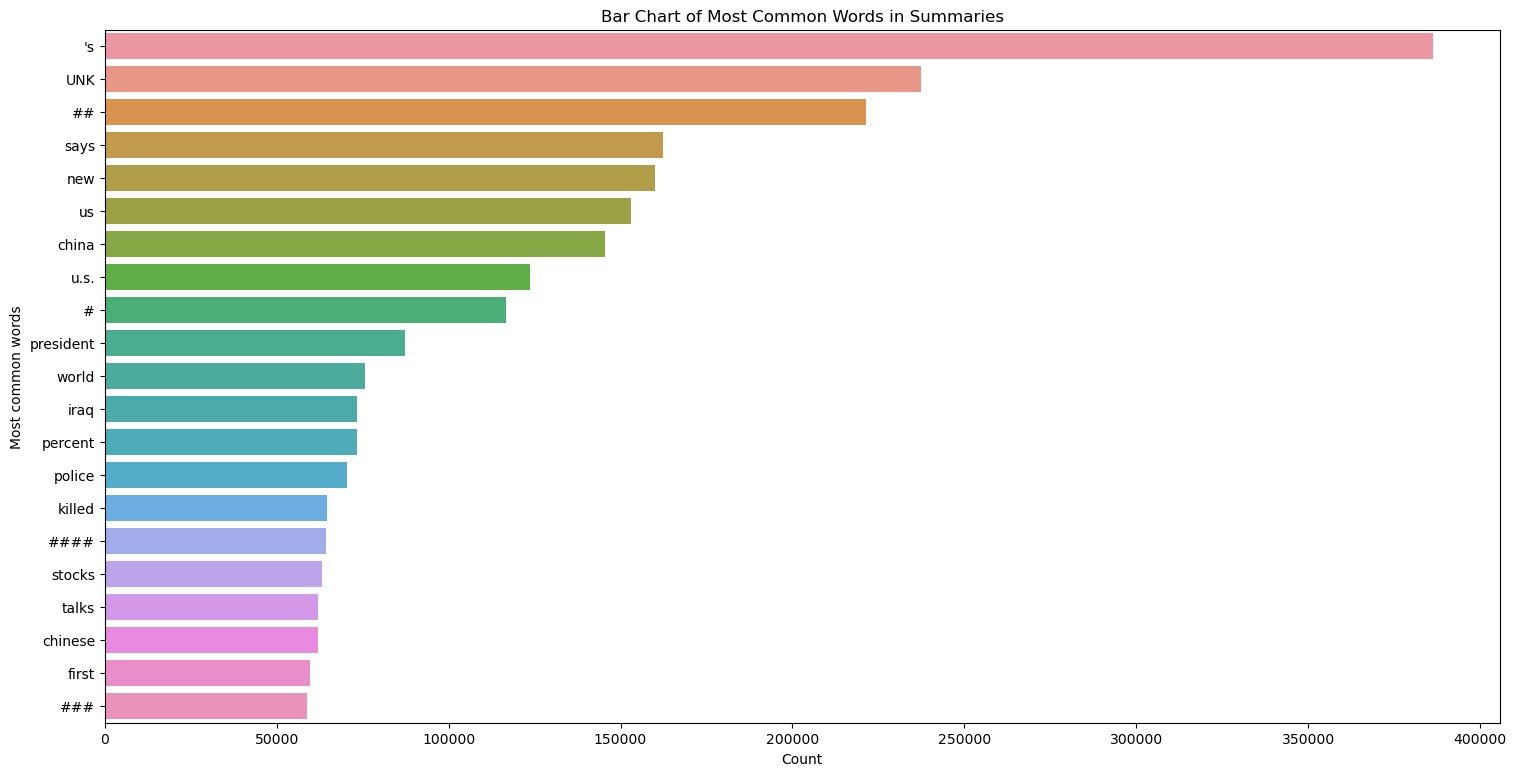

In [16]:
# https://app.neptune.ai/o/neptune-ai/org/eda-nlp-tools/n/1-4-top-non-stopwords-barchart-36267acc-a418-4a5f-a3ba-67a3b51dde12/b57bc536-8cec-46a7-918c-60fba6f2c83d
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools


# bar chart of most common non-stopwords in summaries

# create variable for list of stopwords
stop = set(stopwords.words('english'))

# isolate summary column of corpus df
corpus_summ = corpus["summary"]

# separate individual words in all summaries into lists
# compile all words from all entries into one list
corpus_splt = corpus_summ.str.split()
corpus_list = corpus_splt.values.tolist()
words = [word for i in corpus_list for word in i]

# create a word counter that identifies the most common words in our list
counter = Counter(words)
most = counter.most_common()

# set x and y variables as lists
x, y= [], []

# for words and their word counts in the list of 41 most common words
for word,count in most[:40]:
    # if the word is not a stop word
    if (word not in stop):
        # append the word and its count to the x and y lists
        x.append(word)
        y.append(count)

# specify the parameters for the graph and generate
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common words")
ax.set_title("Bar Chart of Most Common Words in Summaries")
sns.barplot(x=y,y=x)

This chart, to us, was a little more interesting. Apostrophe "S" is still towards the top, which makes sense logically, but the punctuation is gone, which may be an indication of the lower sentence count and likely less need for commas in the summaries. The mysterious "UNK" is very high for summaries, which is unusual. Far more proper nouns are present on this list, which may reflect that summaries attempt to capture the core essense of the headlines, leaving more superfluous details like days of the week out.

<Axes: title={'center': 'Histogram of Average Characters per Word in Document Entries'}, xlabel='Characters per word', ylabel='Count'>

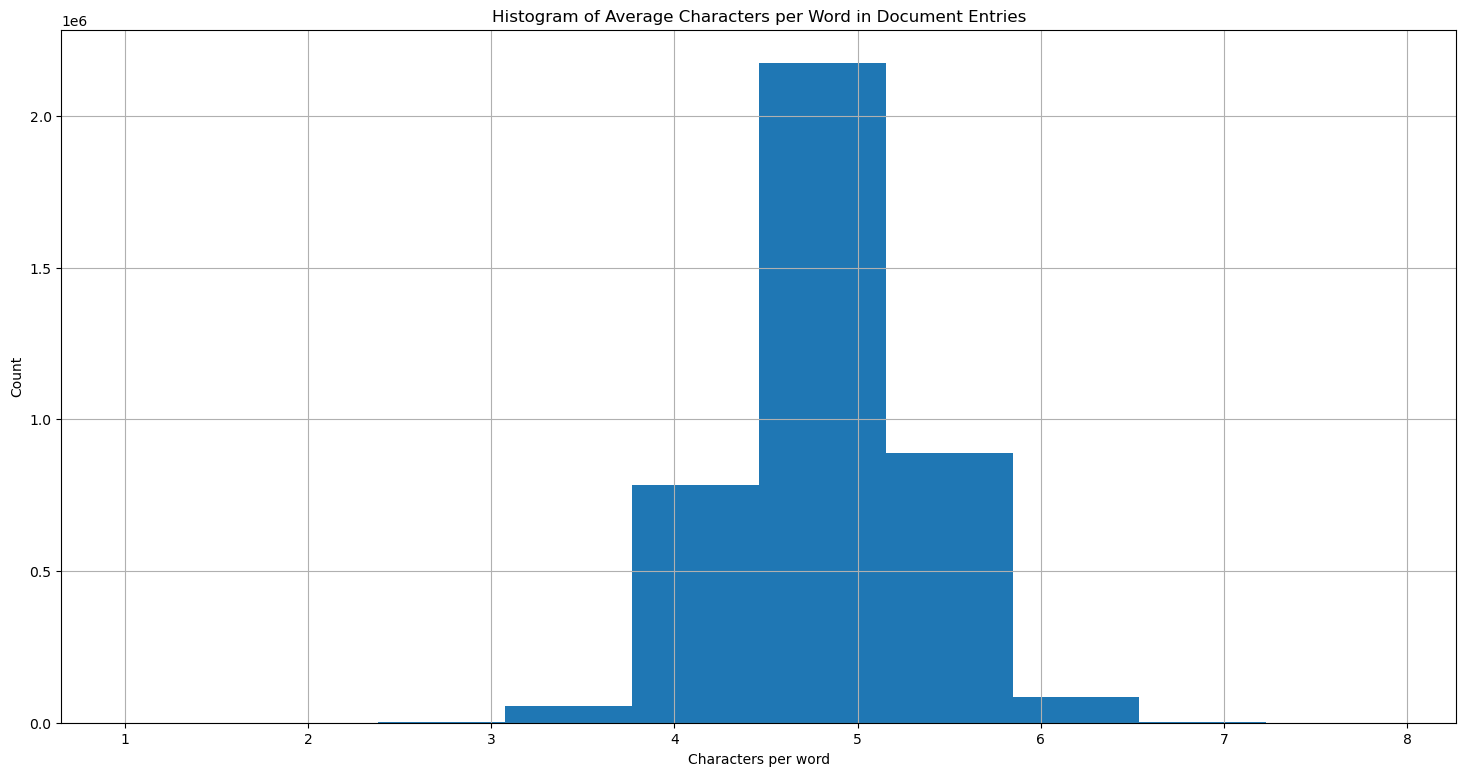

In [17]:
# source code for these two histograms from the following article -
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# formatting for the output graphs were modified, and variables were adjusted to fit our workspace

# histogram of average characters per word in document entries

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Characters per word")
ax.set_ylabel("Count")
ax.set_title("Histogram of Average Characters per Word in Document Entries")

# split each document entry into a list of "words"
# count the number of characters in each word
# calculate the average of these lengths
# plot the values on a histogram
corpus['document'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Interestingly, the average number of characters per word seems to be fairly evenly distributed for document entries. The values peak at a value just below 5, and almost all instances fall between values of 3.5 and 6.5. The range appears to be from around a minimum of 2.5 to a maximum of 7.25. This could reflect varied word use in news headlines.

<Axes: title={'center': 'Histogram of Average Characters per Word in Summaries'}, xlabel='Characters per word', ylabel='Count'>

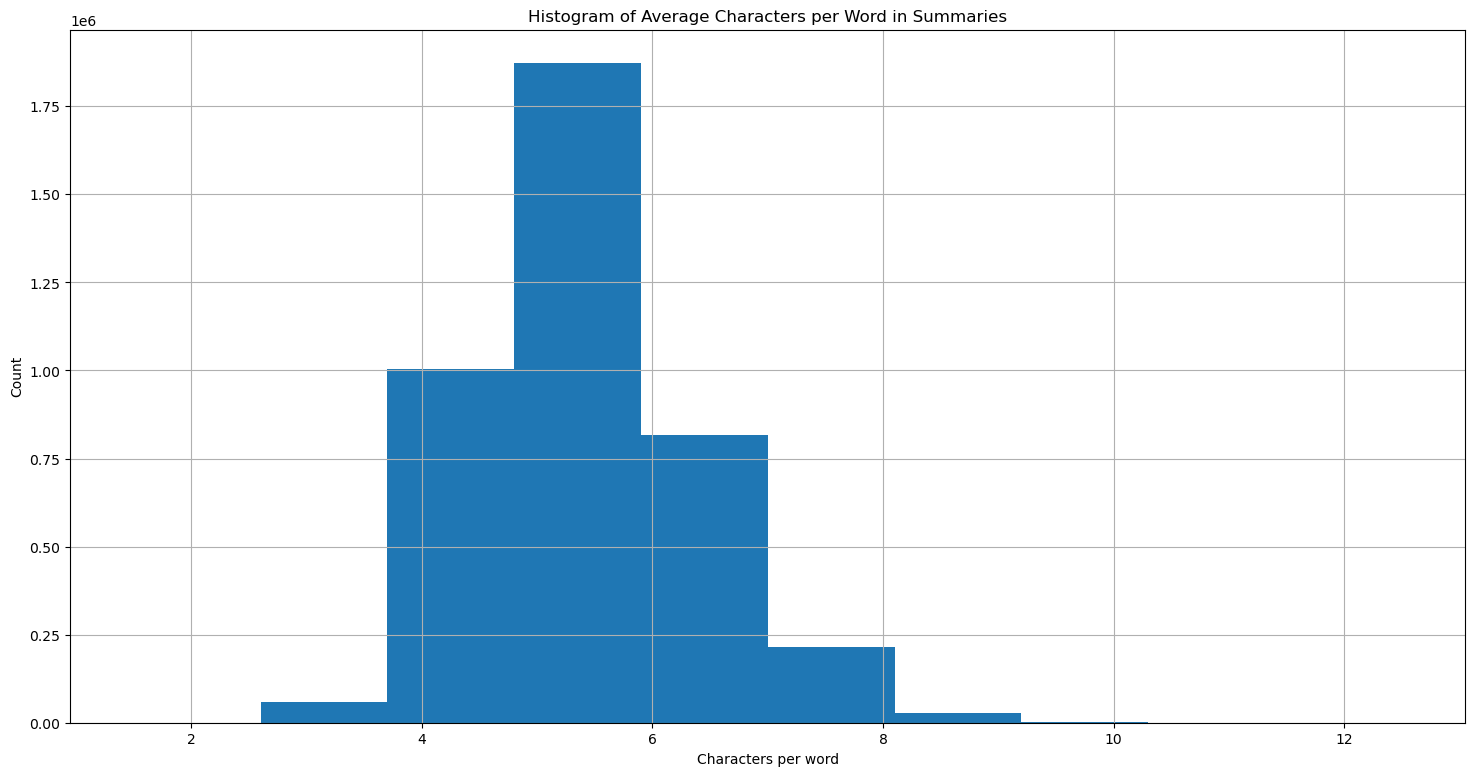

In [18]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# histogram of average characters per word in summaries

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Characters per word")
ax.set_ylabel("Count")
ax.set_title("Histogram of Average Characters per Word in Summaries")

# split each document entry into a list of "words"
# count the number of characters in each word
# calculate the average of these lengths
# plot the values on a histogram
corpus['summary'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Unlike the average characters per word in document entries, the value distribution for average characters per word in summaries is more right skewed. The minimum value is similar (around 2.5), but the maximum value is much higher (over 10). The peak of instances is betweeen 5 and 6, which is slightly higher than for document entries. This could reflect that summaries likely contain more names and proper nouns, and must attempt to be more descriptive in fewer words than a standard headline. Tighter restrictions on word count could lead to a decrease in short filler words (or stop words that have not been removed yet).

In [19]:
# source code for the remaining four bar charts and this function is from the following article -
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# comments were added, variables and function calls were modified to fit our workspace, and the formatting of the charts was changed

# function to gather the top n-grams from a given dataset
# the type of n-gram is specified as a parameter
def get_top_ngram(corpus, n=None):
    # utilize the count vectorizer model from sklearn's feature extraction package for text
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    # compile all n-grams within the given dataset, determine frequency of each, and return the 10 most common
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: title={'center': 'Bar Chart of Most Common Bigrams in Document Entries'}, xlabel='Count', ylabel='Most common bigrams'>

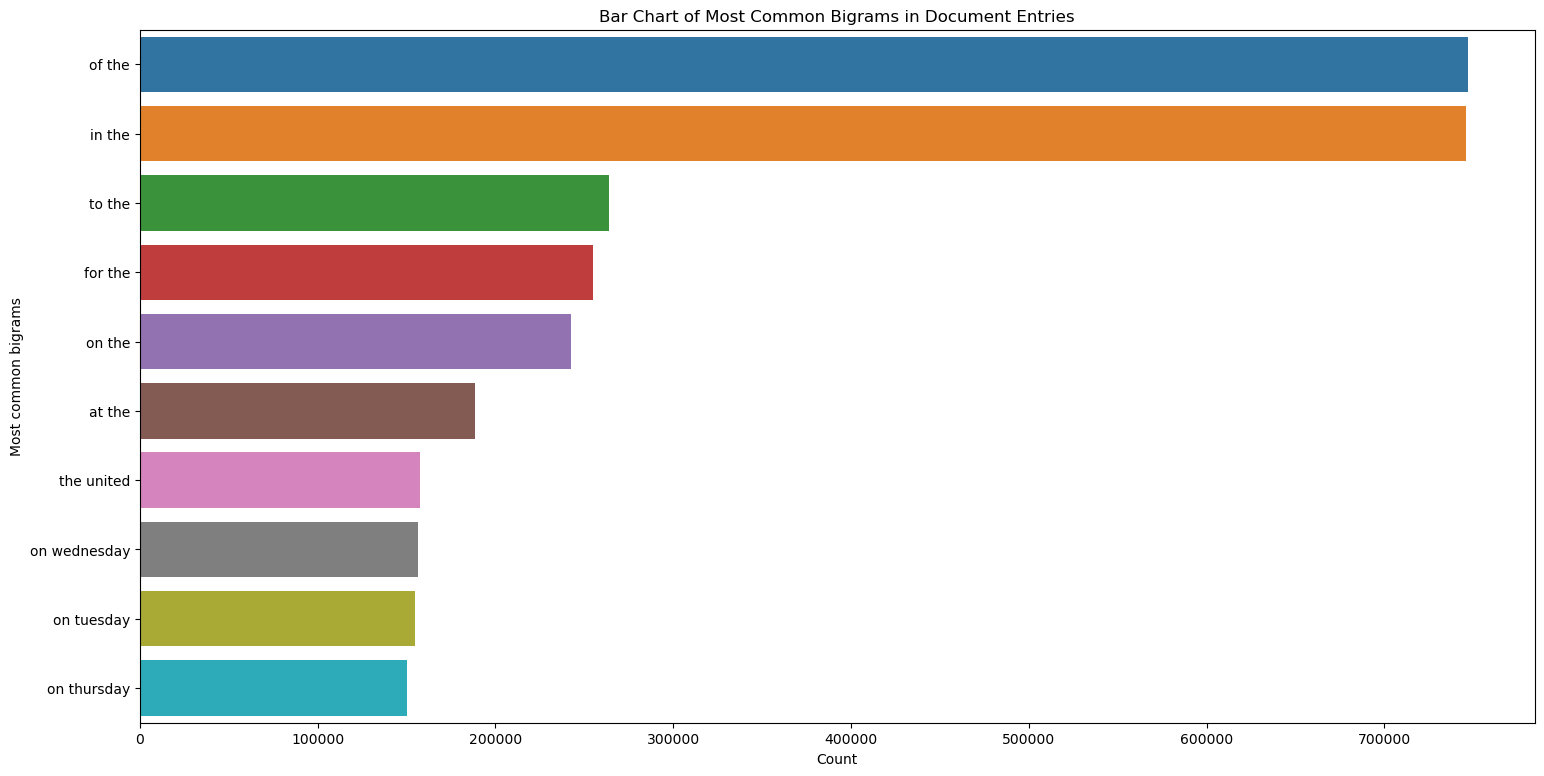

In [20]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# bar chart of the top bigrams in document entries

# call top n-gram function on document column in corpus
dox_top_n_bigrams = get_top_ngram(corpus['document'], 2)[:10]

# map output bigrams and their frequencies to x and y variables
x, y = map(list, zip(*dox_top_n_bigrams))

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common bigrams")
ax.set_title("Bar Chart of Most Common Bigrams in Document Entries")

# generate bar chart using seaborn, transpose x and y axes for more readable display
sns.barplot(x=y, y=x)

It does not come as a surprise that the majority of the top bigrams in headlines are composed of stop words. We will account for this in our data pre-processing step, which should fix this problem. The fact that "the united" is the next highest after all the stop words could be explained by the fact that several nations have "the united" at the beginning, or just that the sample of news articles used is heavily United States-biased. We did find it interesting that although a previous chart showed that "tuesday" was the most common day of the week in document entries, "on wednesday" specifically is actually more common than "on tuesday." This must mean that Tuesday was frequently referenced in other ways.

<Axes: title={'center': 'Bar Chart of Most Common Bigrams in Summaries'}, xlabel='Count', ylabel='Most common bigrams'>

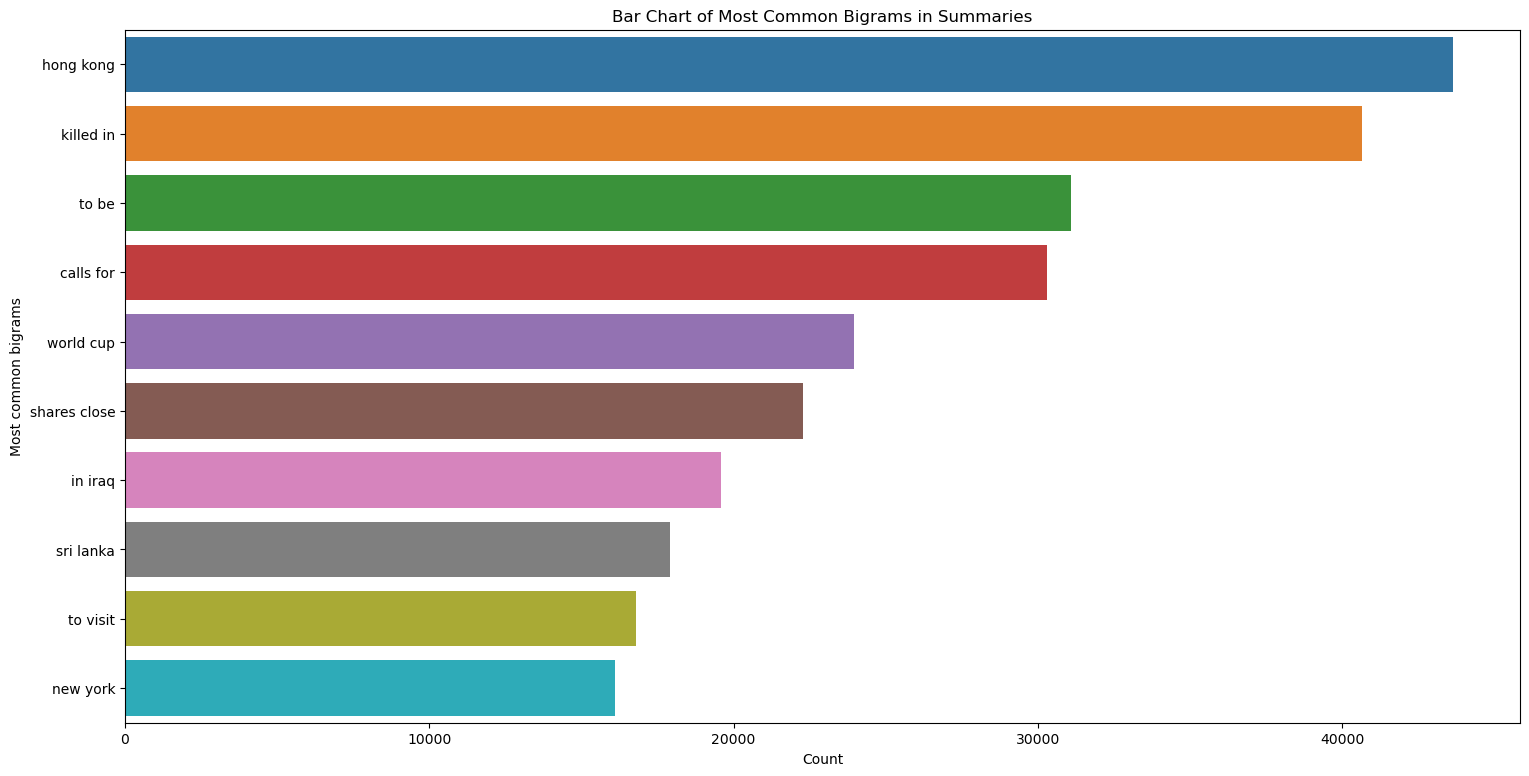

In [21]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# bar chart of the top bigrams in summaries

# call top n-gram function on summary column in corpus, specifying search for bigrams
dox_top_n_bigrams = get_top_ngram(corpus['summary'], 2)[:10]

# map output bigrams and their frequencies to x and y variables
x, y = map(list, zip(*dox_top_n_bigrams))

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common bigrams")
ax.set_title("Bar Chart of Most Common Bigrams in Summaries")

# generate bar chart using seaborn, transpose x and y axes for more readable display
sns.barplot(x=y, y=x)

"Hong Kong" being the number one bigram in summaries is interesting, because it contradicts the notion we gathered from our previous chart that the United States was constantly in the headlines (notice "united states" is not even on the chart). Similar to our most common word charts, the summary bigrams contain far more proper nouns and specific references. It's a bit sad that "killed in" is the second most common summary bigram. The heavy use of "shares close" again evidences lots of fiscal reports. Frequent mentions of "world cup" indicate these headlines were likely taken from a time frame close to the world cup's occurence.

<Axes: title={'center': 'Bar Chart of Most Common Trigrams in Document Entries'}, xlabel='Count', ylabel='Most common trigrams'>

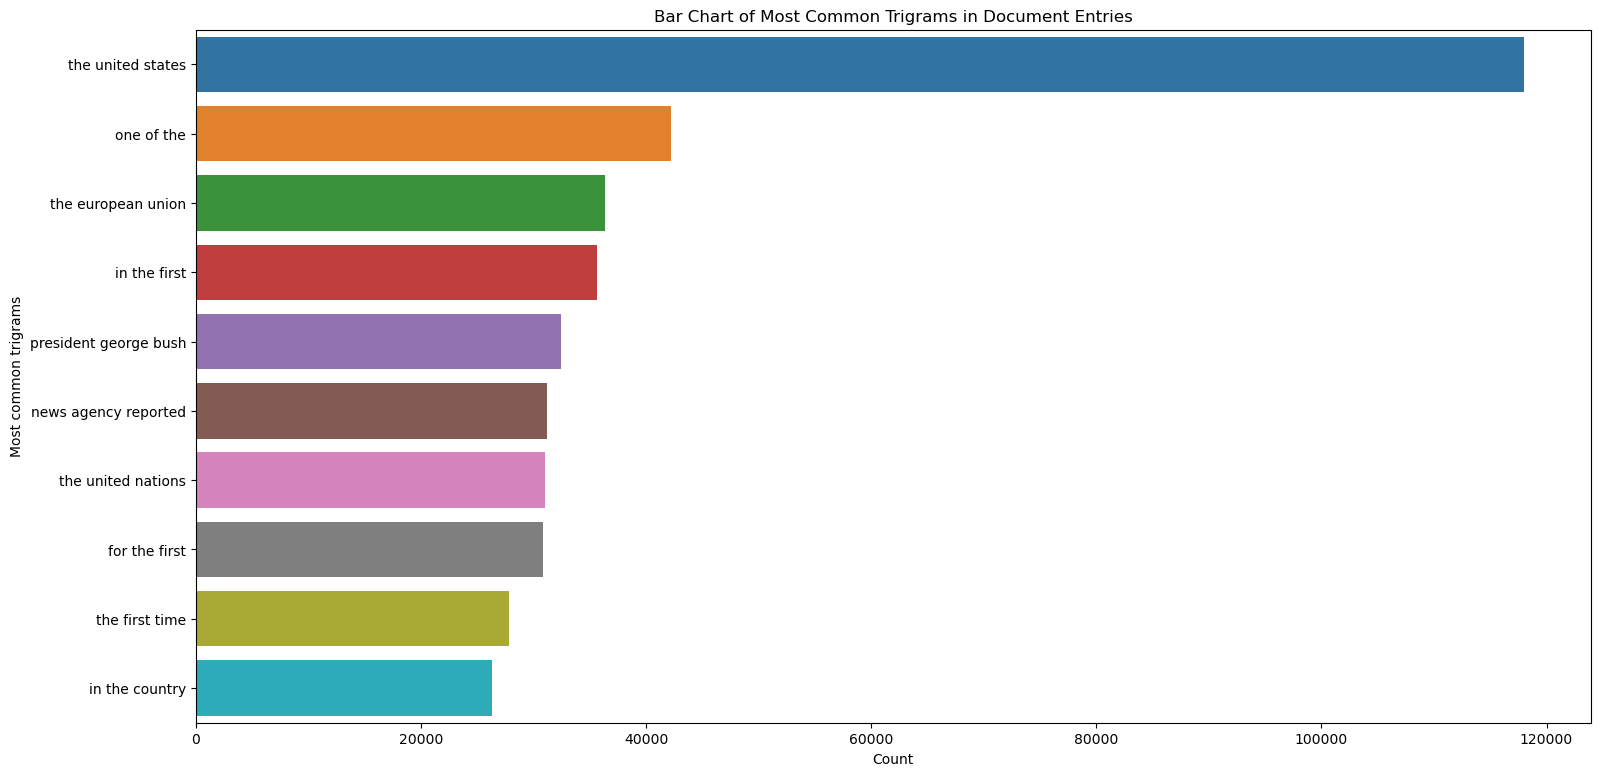

In [22]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# bar chart of the top trigrams in document entries

# call top n-gram function on document column in corpus, specifying search for trigrams
dox_top_tri_grams = get_top_ngram(corpus['document'], n=3)

# map output trigrams and their frequencies to x and y variables
x, y = map(list, zip(*dox_top_tri_grams))

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common trigrams")
ax.set_title("Bar Chart of Most Common Trigrams in Document Entries")

# generate bar chart using seaborn, transpose x and y axes for more readable display
sns.barplot(x=y, y=x)

Apparently, when taken as a trigram, "the united states" was nearly three times as frequent as the next highest trigram in document entries (even beating out stop words!). Significantly less frequent than the US, but still above some stop word-based trigrams, "the european union" and "the united nations" also received frequent mention. Clearly former President George Bush was in office at the time these headlines were compiled. Mentioning news agencies (via "news agency reported") makes sense for news headlines.

<Axes: title={'center': 'Bar Chart of Most Common Trigrams in Summaries'}, xlabel='Count', ylabel='Most common trigrams'>

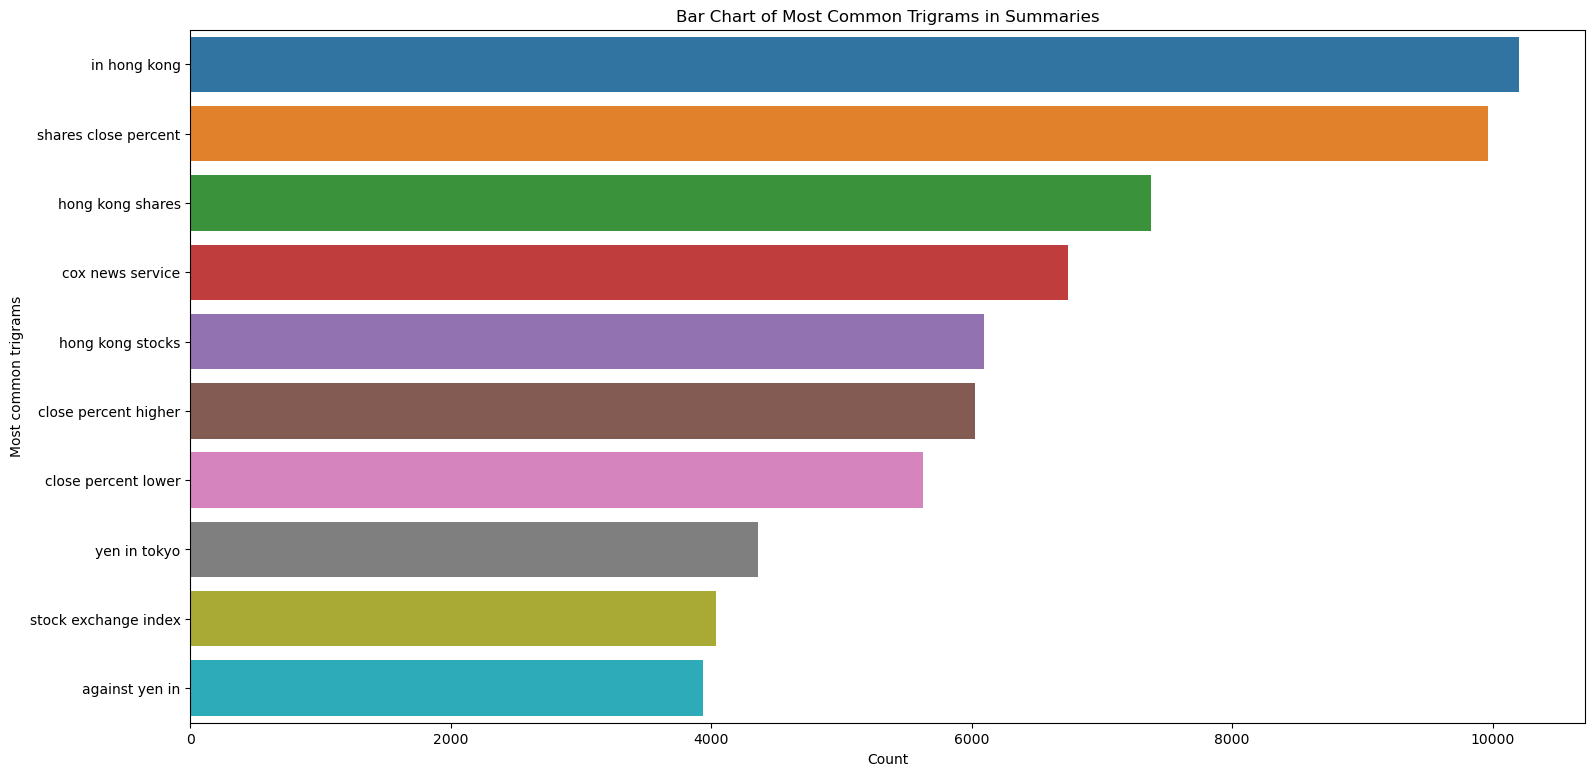

In [23]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

# bar chart of the top trigrams in summaries

# call top n-gram function on summary column in corpus, specifying search for trigrams
summ_top_tri_grams = get_top_ngram(corpus['summary'], n=3)

# map output trigrams and their frequencies to x and y variables
x, y = map(list, zip(*summ_top_tri_grams))

# specify the parameters for the graph
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlabel("Count")
ax.set_ylabel("Most common trigrams")
ax.set_title("Bar Chart of Most Common Trigrams in Summaries")

# generate bar chart using seaborn, transpose x and y axes for more readable display
sns.barplot(x=y,y=x)

Similar to bigrams, summary trigrams have references to Hong Kong (via "in hong kong", "hong kong shares," and "hong kong stocks") being the most, third, and fifth most frequent, respectively. Fiscal reports are clearly a significant portion of the articles compiled, as eight of the top ten most frequent trigrams are related to stocks or finances - "shares close percent," "hong kong shares," "hong kong stocks," "close percent higher," "close percent lower," "yen in tokyo," "stock exchange index," and "against yen in."

## Data Pre-Processing
For our data pre-processing, we decided to include the following steps:
* set all text to lowercase
* remove all symbols and punctuation
* remove stopwords
* word tokenization
* lemmatization

We chose these elements for our processing pipeline because we wanted to streamline and minimize the datasets prior to model implementation, removing all unecessary and distracting data that may interfere with model training and output performance. After going through our pre-processing pipeline, the data will be
* uniform in format (all lower case)
* only include meaningful words/elements that will optimize model training (removing symbols, punctuation, and stop words)
* vectorized into a structure that is machine-readable (tokenization)
* normalized into a format that will increase model training accuracy and hopefully improve outputs (lemmatization)

In [24]:
# the methods required to perform this function were found in this article -
# https://aparnamishra144.medium.com/how-to-change-string-data-or-text-data-of-a-column-to-lowercase-in-pandas-248a8ce4ae01
# the function and comments are our original work

# set all words in all rows to lower case

def lower(df):
    # vectorize strings in each row in summary column and set to lower case
    df["summary"] = df["summary"].str.lower()
    print("summary column lowercased")
    # vectorize strings in each row in document column and set to lower case
    df["document"] = df["document"].str.lower()
    print("document column lowercased")

In [25]:
# geeks for geeks and pandas doc pages were used as template source code and informed about parameter options
# stackoverflow posts helped with debugging issues
# https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# https://www.geeksforgeeks.org/string-punctuation-in-python/
# https://stackoverflow.com/questions/41425945/python-pandas-error-missing-unterminated-subpattern-at-position-2
# https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
# comments and function are our original work, source code was modifed to fit our workspace

# remove all symbols and punctuation

# create instance of all punctuation symbols
punctuation = string.punctuation

# since we learned there are lots of apostrophe s in the dataset during EDA, we will add this to our remove list
punct_list = ["'s"]

# add all punctuation from the premade variable to our new list
for symbol in punctuation:
    punct_list.append(symbol)

# display the symbols included in our list
print(punct_list)

def remove_punctuation(df):
    # for each symbol in our punctuation list
    for symbol in punct_list:
        # iterate through the dataframe and replace every instance of the symbol with an empty string
        df["document"] = df["document"].str.replace(symbol, "")
        df["summary"] = df["summary"].str.replace(symbol, "")
    print("symbols removed")

["'s", '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [26]:
# source code and ideas for this process were gathered from the following geeks for geeks page and article -
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
# comments and functions are original work, source code was modified to fit our workspace

# tokenization and removal of stopwords

# create an instance of all stopwords
stop_words = set(stopwords.words('english'))

# function for removing stopwords from a given input
def remove_stopwords(text):
    # tokenize the input string
    tokens = word_tokenize(text)
    # create an empty list for the new output
    filtered_tokens = []
    # for each word in the tokenized text
    for word in tokens:
        # if the word is not a stop word
        if word not in stop_words:
            # add the token to the new output list
            filtered_tokens.append(word)

    return filtered_tokens

# function to apply the stopword removal/tokenization function to input dataframes
def tokenize_nostop(df):
    # iterate through the dataframe and tokenize/remove stop words for each row
    df["document"] = df["document"].apply(remove_stopwords)
    print("stopwords removed from document column")
    
    df["summary"] = df["summary"].apply(remove_stopwords)
    print("stopwords removed from summary column")

In [27]:
# inspiration and source code for NLTK's word net lemmatizer came from the following article -
# https://www.analyticsvidhya.com/blog/2021/06/pre-processing-of-text-data-in-nlp/
# functions and comments are our original work, source code was modified to fit our workspace

# lemmatization

# create an instance of NLTK's word net lemmatizer class
wml = WordNetLemmatizer()

# function to lemmatize a given tokenized text input
def lemmatization(text):
    # create an empty list for new output
    lemma_words = []

    # for each word in the given input
    for word in text:
        # lemmatize the word
        token = wml.lemmatize(word)
        # and add it into our new output list
        lemma_words.append(token)
    
    return lemma_words

# function to call lemmatization function on the rows of an input dataframe
def lemmatize(df):
    # iterate through the rows of the input dataframe and apply the lemmatization function to each row
    df["document"] = df["document"].apply(lemmatization)
    print("document column lemmatized")

    df["summary"] = df["summary"].apply(lemmatization)
    print("summary column lemmatized")

In [28]:
# create data pre-processing pipeline

def pre_proc(df):
    # lowercase
    lower(df)
    # remove punctuation and symbols
    remove_punctuation(df)
    # tokenize and remove stopwords
    tokenize_nostop(df)
    # lemmatize
    lemmatize(df)
    print("pre-processed successfully")

In [29]:
# call the data pre-processing pipeline for each of the dataset splits

pre_proc(df_train)
print("train df completed")
pre_proc(df_test)
print("test df completed")
pre_proc(df_val)
print("validation df completed")

# display new format of data using training set
df_train.head(10)

summary column lowercased
document column lowercased
symbols removed
stopwords removed from document column
stopwords removed from summary column
document column lemmatized
summary column lemmatized
pre-processed successfully
train df completed
summary column lowercased
document column lowercased
symbols removed
stopwords removed from document column
stopwords removed from summary column
document column lemmatized
summary column lemmatized
pre-processed successfully
test df completed
summary column lowercased
document column lowercased
symbols removed
stopwords removed from document column
stopwords removed from summary column
document column lemmatized
summary column lemmatized
pre-processed successfully
validation df completed


,document,summary
0,"[australia, current, account, deficit, shrunk,...","[australian, current, account, deficit, narrow..."
1,"[least, two, people, killed, suspected, bomb, ...","[least, two, dead, southern, philippine, blast]"
2,"[australian, share, closed, percent, monday, f...","[australian, stock, close, percent]"
3,"[south, korea, nuclear, envoy, kim, sook, urge...","[envoy, urge, north, korea, restart, nuclear, ..."
4,"[south, korea, monday, announced, sweeping, ta...","[skorea, announces, tax, cut, stimulate, economy]"
5,"[taiwan, share, price, closed, percent, monday...","[taiwan, share, close, percent]"
6,"[australian, share, closed, percent, monday, f...","[australian, stock, close, percent]"
7,"[spanish, property, group, colonial, strugglin...","[spain, colonial, post, billion, euro, loss]"
8,"[libyan, leader, moamer, kadhafi, monday, prom...","[kadhafi, promise, wide, political, economic, ..."
9,"[united, nation, humanitarian, chief, john, ho...","[un, top, aid, official, arrives, droughthit, ..."


Our dataset splits are now pre-processed and ready for use with models.